## TP1


## 1: Quelle est la moyenne des votes par profession ("job") et par âge? (2 points)

In [1]:
### Lecture des données
user <- read.csv(file='u.user.csv', sep='|', header=T)
item <- read.csv(file='u.item.csv', sep='|', header=T)
data <- read.csv(file='u.data.csv', sep='|', header=T)

In [2]:
# merge des dataframes en un seul
colnames(user)[colnames(user)=="id"] <- "user.id"
colnames(item)[colnames(item)=="movie.id"] <- "item.id"

allData <- merge(x=data,y=user,by="user.id",all=TRUE)
allData <- merge(x=allData,y=item,by="item.id",all=TRUE)
allData[1:3,]

item.id user.id rating timestamp age gender job        zip   movie.title     
1 1         1     5      874965758 24  M      technician 85711 Toy Story (1995)
2 1       117     4      880126083 20  M      student    16125 Toy Story (1995)
3 1       429     3      882385785 27  M      student    29205 Toy Story (1995)
  release.date ⋯ Fantasy Film.Noir Horror Musical Mystery Romance Sci.Fi
1 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
2 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
3 01-Jan-1995  ⋯ 0       0         0      0       0       0       0     
  Thriller War Western
1 0        0   0      
2 0        0   0      
3 0        0   0

In [3]:
profession_mean = aggregate(allData$rating, list(allData$job), mean)

#hist(profession_mean)
#profession_mean

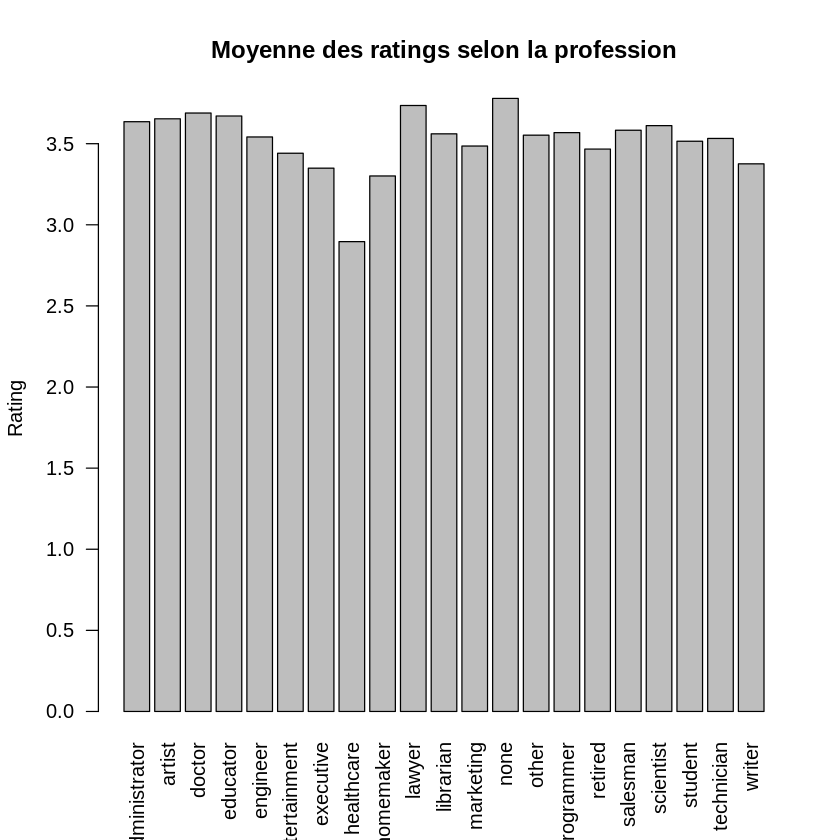

In [4]:
barplot(profession_mean$x,names.arg=profession_mean$Group.1,xlab="",ylab="Rating",
main="Moyenne des ratings selon la profession", las=2)

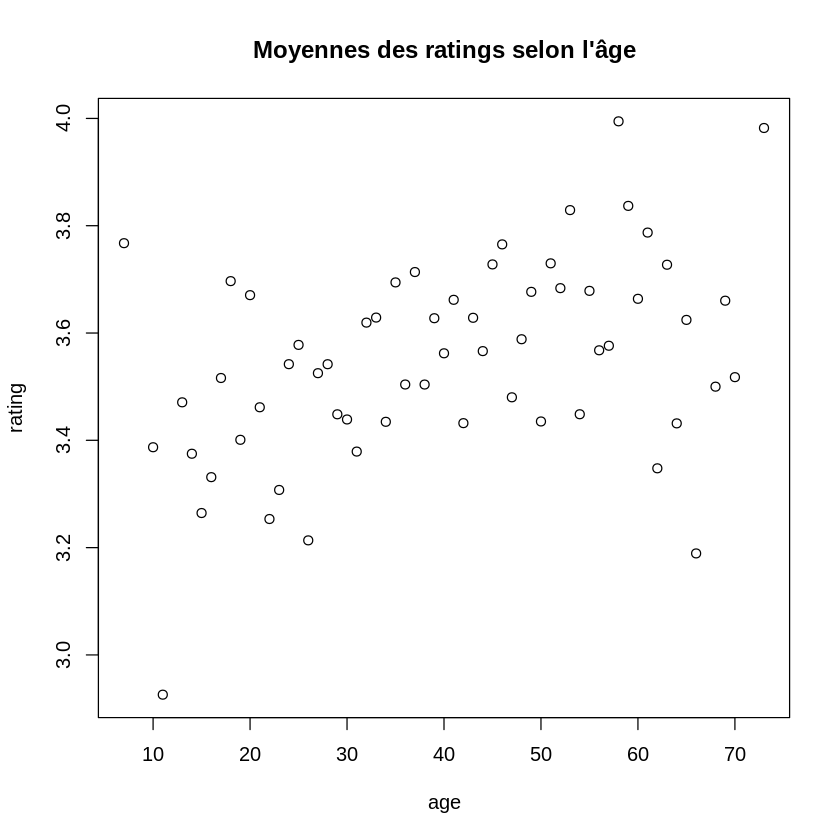

In [5]:
age_mean = aggregate(allData$rating, list(allData$age), mean)
plot(age_mean[,1], age_mean[,2], xlab = "age", 
     ylab = "rating", main="Moyennes des ratings selon l'âge")


## 2: Quels sont les 10 films les plus similaires à "Star Trek V: The Final Frontier (1989)" selon respectivement la mesure du cosinus et de la corrélation avec la matrice de votes.  (3 points)

In [6]:
# Voir les slides pour le principe de corrélation avec cosinus. 
# Dans les slides, on compare des utilisateurs. 
# Pour cette question, on a juste à transposer la matrice (pour faire le calcul sur les items au lieu des utilisateurs)
# Ensuite, on sort les items (films) selon les poids w calculés et on prend les 10 poids les plus grands.

library(Matrix)
	    m <- sparseMatrix(data[,1],data[,2],x=data[,3])
	    rownames(m) <- paste('u', 1:nrow(m), sep='')
	    colnames(m) <- paste('i', 1:ncol(m), sep='')


In [7]:
# transpose matrix to have each line representing a movie
mt <- t(m)
stid <- 450 #le id de star trek 
strow <- t(mt[stid,])

In [8]:
# compute all Wcos for each movie for star trek

cosinus.vm <- function(v,mt) { n <- sqrt(colSums(mt^2)); (v %*% mt)/(n * sqrt(sum(v^2))) }
all.cos <- cosinus.vm(strow, m)

In [9]:
# sort movies by Wcos and get the first 10 (or 11 because star treck itself souldnt count)
all.cos <- all.cos[,order(-all.cos[1,]),drop=F];
all.cos[,1:11, drop=F]

1 x 11 Matrix of class "dgeMatrix"
     i450      i449     i227      i229      i230      i228       i62      i380
[1,]    1 0.6080518 0.553322 0.5455677 0.5144135 0.4702339 0.4540497 0.4204334
         i226      i636      i679
[1,] 0.398426 0.3804155 0.3779706

In [10]:
# Les 10 films les plus semblables à Star Trek V: The Final Frontier (1989) sont donc:
#item[item[, "item.id"] == 449,2]
item[item[, "item.id"] == 449,2]
item[item[, "item.id"] == 227,2]
item[item[, "item.id"] == 229,2]
item[item[, "item.id"] == 230,2]
item[item[, "item.id"] == 228,2]
item[item[, "item.id"] == 62,2]
item[item[, "item.id"] == 380,2]
item[item[, "item.id"] == 226,2]
item[item[, "item.id"] == 636,2]
item[item[, "item.id"] == 679,2]

[1] Star Trek: The Motion Picture (1979)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek VI: The Undiscovered Country (1991)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek III: The Search for Spock (1984)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek IV: The Voyage Home (1986)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: The Wrath of Khan (1982)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Stargate (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: Generations (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Die Hard 2 (1990)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Escape from New York (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Conan the Barbarian (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

In [11]:
# Correlation
# compute all Wcor for each movie for star trek

#correlation.vm <- function(v,mt) { n <- sqrt(colSums(mt^2)); (v %*% mt)/(n * sqrt(sum(v^2))) }
#cor(as.numeric(m), as.numeric(strow), use='pairwise.complete.obs')
#mm <- t(as.numeric(m))
cor.matrix = cor(as.matrix(m), use='pairwise.complete.obs')


In [12]:
w_list <- cor.matrix[order(cor.matrix[,450], decreasing = TRUE),]
w_list

i1          i2           i3           i4           i5          
i450   0.12437925 0.18309460   0.02505888   0.17676326   0.15564998  
i449   0.18005580 0.35435258   0.06602491   0.28688544   0.22326059  
i227   0.25528261 0.47861803   0.13108662   0.39088391   0.21984232  
i229   0.25852771 0.47933603   0.14477310   0.35581140   0.24036319  
i230   0.26808692 0.44906446   0.11495013   0.38640288   0.20192036  
i228   0.33436333 0.45541413   0.11821936   0.39030594   0.19682458  
i62    0.20571785 0.54870101   0.22588760   0.37199228   0.20704823  
i380   0.21354816 0.31599509   0.14282511   0.27407097   0.14603179  
i226   0.19297378 0.53029583   0.21281299   0.44193846   0.33470894  
i636   0.18068996 0.33651191   0.12952682   0.35511988   0.26287846  
i679   0.19722631 0.44973323   0.07973696   0.31748298   0.19538019  
i554   0.14831723 0.48747033   0.19876635   0.35025400   0.22154557  
i550   0.20071363 0.52555485   0.23097981   0.45419555   0.30240975  
i431   0.20807293 0.45690642   0.20801157   0.39335327   0.16571046  
i77    0.18947803 0.31140518   0.19563166   0.32684698   0.33219419  
i373   0.13223884 0.37466435   0.14478060   0.22142238   0.11405620  
i385   0.23055368 0.54743428   0.20081066   0.49726830   0.27380598  
i1274  0.05309527 0.20924263   0.05153190   0.10207639   0.07012186  
i29    0.20459539 0.52657016   0.17646496   0.33503151   0.25081660  
i54    0.19841171 0.43691152   0.23640924   0.32154206   0.41825548  
i391   0.12939333 0.41085774   0.09032780   0.27797015   0.10172545  
i576   0.16072509 0.55586052   0.17189974   0.36604366   0.26321029  
i552   0.14993107 0.34214925   0.27234274   0.26683210   0.27735138  
i161   0.27769915 0.55348330   0.20633036   0.46212207   0.27377104  
i94    0.24450089 0.43912924   0.18356675   0.32794007   0.22031961  
i562   0.13925961 0.28115930   0.18238094   0.27246295   0.17356262  
i403   0.26233125 0.54664082   0.23265579   0.48534927   0.24464641  
i901  -0.03231632 0.04308261   0.01361607   0.01761262   0.00425729  
i265   0.28674450 0.42901248   0.16780712   0.39114158   0.20764341  
i386   0.17961390 0.35597049   0.20092665   0.30821108   0.15866012  
⋮     ⋮           ⋮            ⋮            ⋮            ⋮           
i1204  0.02057772  0.007236310 -0.003918405  0.048401950 -0.009603480
i349  -0.08720876  0.012955180  0.005815388  0.013829196  0.036325459
i1117  0.04125622 -0.046302630  0.040604967  0.074502409 -0.013478159
i305  -0.09384914 -0.011759134  0.007227902  0.021019934 -0.035503961
i1296 -0.04339909 -0.008993352 -0.021519835 -0.029023733 -0.009764542
i1009  0.02222460 -0.046750385  0.227637513  0.064244247  0.016576879
i490   0.05285145  0.008404954  0.027286170  0.137710623  0.008694091
i315  -0.06500075  0.035637400  0.055000940  0.081359658  0.036177506
i749  -0.04729729 -0.010962719  0.052169419 -0.033001929 -0.029247059
i325  -0.01203606  0.004398228  0.132140218 -0.008655634  0.060028739
i962   0.03342270 -0.001885158 -0.018837152  0.127166638  0.054567026
i1008  0.05309769 -0.008785534  0.155362642  0.110049006  0.033020643
i1020  0.04385449  0.041846978  0.053715797  0.118453575  0.014336170
i6     0.01511263  0.030062271  0.065346968  0.021877722 -0.008593776
i312  -0.08838497 -0.035638158  0.037222830  0.002148256  0.008906308
i937  -0.05938237 -0.063157173 -0.038761529 -0.050714608 -0.033834768
i989   0.03711074 -0.018350353  0.007018872  0.005286420  0.032888791
i324  -0.07711190 -0.004371984  0.107082418  0.006234651  0.056885710
i327  -0.10663659 -0.046562725 -0.015061707 -0.032612431  0.028419736
i995  -0.03887467 -0.040154742  0.004779354 -0.043387534 -0.034538779
i311  -0.09309620 -0.026505580 -0.046913328  0.024643764 -0.049020777
i301  -0.04269457 -0.027851994  0.027449217  0.014027094 -0.005549121
i303  -0.13180560 -0.055792681 -0.026273571  0.021222423 -0.045362613
i306  -0.10125860 -0.087942852 -0.015827038 -0.039828582 -0.046205847
i269  -0.10346436 -0.037668248  0.011305264  0.036903212 -0.074461522
i344  -0.1109074

In [13]:
item[item[, "item.id"] == 449,2]
item[item[, "item.id"] == 227,2]
item[item[, "item.id"] == 229,2]
item[item[, "item.id"] == 230,2]
item[item[, "item.id"] == 228,2]
item[item[, "item.id"] == 62,2]
item[item[, "item.id"] == 380,2]
item[item[, "item.id"] == 226,2]
item[item[, "item.id"] == 636,2]
item[item[, "item.id"] == 679,2]

[1] Star Trek: The Motion Picture (1979)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek VI: The Undiscovered Country (1991)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek III: The Search for Spock (1984)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek IV: The Voyage Home (1986)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: The Wrath of Khan (1982)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Stargate (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Star Trek: Generations (1994)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Die Hard 2 (1990)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Escape from New York (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

[1] Conan the Barbarian (1981)
1664 Levels: 'Til There Was You (1997) 1-900 (1994) ... Zeus and Roxanne (1997)

## 3: Utilisez une approche item-item pour calculer le vote au film "Star Trek V: The Final Frontier (1989)" des utilisateurs qui n'ont pas de vote pour celui-ci. Prenez les 20 voisins les plus rapprochés selon la distance euclidienne et utilisez les cosinus comme poids. Si aucun vote commun existe, alors la valeur prédite est fixée à NA. (3 points)


## 4: Calculez l'erreur quadratique moyenne des prédiction de l'approche item-item à la question précédente en la comparant aux valeurs observées. (2 points)


## 5: Utilisez une approche par agglomération pour prédire les votes et calculez l'erreur quadratique moyenne. (4 points)

In [14]:
mt

   [[ suppressing 32 column names ‘u1’, ‘u2’, ‘u3’ ... ]]


1682 x 943 sparse Matrix of class "dgCMatrix"
                                                                            
i1    5 4 . . 4 4 . . . 4 . . 3 . 1 5 4 5 . 3 5 . 5 . 5 3 . . . . . . ......
i2    3 . . . 3 . . . . . . . 3 . . . . . . . . 2 . . . . . . . 3 . . ......
i3    4 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
i4    3 . . . . . 5 . . 4 . 5 5 . . 5 . 3 4 . . 5 . . . . . . . . . . ......
i5    3 . . . . . . . . . . . 1 . . . . . . . 2 . . . . . . 3 . . . . ......
i6    5 . . . . . . . 5 . . . . . . . . 5 . . . . . . . . . . . . . . ......
i7    4 . . . . 2 5 3 4 4 . . 2 5 1 5 4 . . . 5 . 4 4 4 3 . 5 . 4 . 4 ......
i8    1 . . . . 4 5 . . . 4 . 4 . . 5 . 5 5 . . . 4 5 4 . . . . . . . ......
i9    5 . . . . 4 5 . . 4 5 . 3 4 4 5 3 5 . . 5 . . 5 . 4 4 . . . . 3 ......
i10   3 2 . . . . 4 . . . . . . . . . . . . . . . . . . . . . . . . . ......
i11   2 . . 4 . . 3 3 . 4 2 . 1 . . 5 . . . 2 . . . 5 . . . 4 . . . . ......
i12   5 . . . . 4 5 . . 5 2 . 

In [15]:
# nombre d'entrées uniques (le maximum de clusters possibles)
dim(unique(as.matrix(mt)))

[1] 1612  943

On a donc maximum 1612 clusters possibles.

In [16]:
clusters = kmeans(mt, 5)
str(clusters)

List of 9
 $ cluster     : Named int [1:1682] 5 1 1 3 1 4 5 3 2 1 ...
  ..- attr(*, "names")= chr [1:1682] "i1" "i2" "i3" "i4" ...
 $ centers     : num [1:5, 1:943] 1.15 1.325 1.907 0.133 3.765 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:943] "u1" "u2" "u3" "u4" ...
 $ totss       : num 1228022
 $ withinss    : num [1:5] 269777 170531 159912 223861 111211
 $ tot.withinss: num 935292
 $ betweenss   : num 292730
 $ size        : int [1:5] 300 80 97 1154 51
 $ iter        : int 6
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


L'attribut tot.withinss est la valeur d'intérêt pour calculer l'erreur quadratique.

"tot.withinss: Total within-cluster sum of squares, i.e. sum(withinss)."
tiré de https://stat.ethz.ch/R-manual/R-devel/library/stats/html/kmeans.html

Cette valeur calculée directement de la fonction kmeans dans R indique la somme des carrés des différences entre chaque valeur d'une entrée observée et chaque valeur de la prédiction (le centroïde du groupe auquel l'entrée a été assignée). Ainsi, pour obtenir l'erreur quadratique, il suffit de diviser cette valeur par le nombre d'entrées.
<br>
<br>
<center>
$tot.withinss = \sum(M_{obs} - M_{pred})²$
<center>
$Erreur\ quadratique = \frac{tot.withinss}{n} = \frac{\sum(M_{obs} - M_{pred})²}{n}$
</center>

Ci-dessous, plusieurs essais de clustering avec kmeans sont tentés, avec différentes quantités de clusters. Chaque essai est effectué sur la totalité des données, on s'attend alors à ce que l'erreur quadratique descende constamment selon le nombre de clusters qui augmente, et que cette erreur soit à 0 lorsque le nombre de clusters déterminé est le même que le nombre d'entrées (uniques), puisque chaque entrée aura comme prédiction ses propres valeurs. Nous remarquons effectivement que l'erreur est nulle lorsque le nombre de clusters est égal au nombre d'entrées (ou au nombre d'entrées uniques).

In [17]:
clusters <- kmeans(mt, 10)
clusters$tot.withinss / 1682

[1] 515.7612

In [18]:
clusters <- kmeans(mt, 15)
clusters$tot.withinss / 1682

[1] 494.2018

In [19]:
clusters <- kmeans(mt, 20)
clusters$tot.withinss / 1682

[1] 479.2877

In [20]:
clusters <- kmeans(mt, 25)
clusters$tot.withinss / 1682

[1] 468.9421

In [21]:
clusters <- kmeans(mt, 30)
clusters$tot.withinss / 1682

[1] 457.1253

In [22]:
clusters <- kmeans(mt, 35)
clusters$tot.withinss / 1682

[1] 448.8609

In [23]:
clusters <- kmeans(mt, 100)
clusters$tot.withinss / 1682

[1] 368.9586

In [24]:
clusters <- kmeans(mt, 1000)
clusters$tot.withinss / 1682

[1] 24.09446

In [25]:
clusters = kmeans(mt, 1612)
clusters$tot.withinss / 1682

[1] 0

## 6: Je suis un nouvel utilisateur. Vous connaissez ma profession, mon sexe et mon âge. Développez un algorithme bayésien pour recommander 10 films sur la base de ces trois catégories. (4 points)

Premièrement, afin de simplifier le problème, nous allons définir une nouvelle variable indiquant si le vote est positif ou non (1 étant "j'ai aimé le film", 0 étant "je n'ai pas aimé le film"). Ainsi, si un rating se trouve entre 0 et 3, il est négatif (0). Un rating de 4 et plus est positif (1).  

In [26]:
allData$binrating <- ifelse(allData$rating > 3, 1, 0)
allData[2:4,c("rating", "binrating")] # exemple pour montrer le résultat

rating binrating
2 4      1        
3 3      0        
4 4      1

Pour chacune des 3 variables, nous implémentons une fonction permettant de calculer la probabilité qu'une personne possédant ce trait aime ou non un film. Le calcul est le suivant: 
<br>
<center>
$\sum{\frac{x_1 + 1}{(x_2 + x_1) + 2}}$
</center>

où:
- $x_1$ est la quantité de personne qui ont aimé le film, possédant l'attribut d'intérêt;
- $x_2$ est la quantité de personne qui n'ont pas aimé le film, possédant l'attribut d'intérêt;
- $+1$ au numérateur et $+2$ au dénominateur permettent d'appliquer la correction de Laplace.

### Profession

In [27]:
length(unique(profession_mean$Group.1))


[1] 21

In [28]:
profession_factor <- function(profession, movieID) {
    (sum(allData$item.id == movieID & allData$job == profession & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$job == profession, na.rm=TRUE) + 2)
    
}
#ex:
profession_factor("student", 5)

[1] 0.4285714

### Sexe

In [29]:
sex_factor <- function(sex, movieID) {
    (sum(allData$item.id == movieID & allData$gender == sex & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$gender == sex, na.rm=TRUE) + 2)
    
}
#ex:
sex_factor("F", 5)
sex_factor("M", 5)

[1] 0.75

[1] 0.3484848

### Âge

In [30]:
n.cat.age <- length(unique(age_mean$Group.1))
n.cat.age

[1] 61

Nous remarquons ici que le nombre d'âges uniques est de 61. Si l'on appliquait directement Naïve Bayes, nous aurions 61 classes, ce qui pourrait entraîner des problèmes puisque chaque classe n'aurait pas suffisamment de données pour que le facteur soit représentatif. Afin de résoudre ce problème, nous allons créer des catégories d'âges afin de mieux représenter les données démographiques avant d'appliquer Bayes.

Les catégories sont les suivantes:
- moins de 15 ans (enfants); | enf
- 15 à 19 ans (ados); | ado
- 20 à 29 ans (jeunes adultes); | jad
- 30 à 49 ans; | adu
- 50 à 69 ans; | avi
- 70 ans et plus. | vie

In [31]:
allData$agecat <- cut(allData$age, breaks = c(-Inf, 15, 19, 29, 49, 69, Inf), 
                        labels = c("enf", "ado", "jad", "adu", "avi", "vie"))

allData

item.id user.id rating timestamp age gender job           zip  
1      1         1     5      874965758 24  M      technician    85711
2      1       117     4      880126083 20  M      student       16125
3      1       429     3      882385785 27  M      student       29205
4      1       919     4      875289321 25  M      other         14216
5      1       457     4      882393244 33  F      salesman      30011
6      1       468     5      875280395 28  M      engineer      02341
7      1        17     4      885272579 30  M      programmer    06355
8      1       892     5      886608185 36  M      other         45243
9      1        16     5      877717833 21  M      entertainment 10309
10     1       580     3      884125243 16  M      student       17961
11     1       268     3      875742341 24  M      engineer      19422
12     1       894     4      880416286 47  M      educator      74075
13     1       535     3      879617663 45  F      educator      80302
14     1       109     4      880563619 29  M      other         55423
15     1       458     4      886394423 47  M      technician    Y1A6B
16     1       331     1      877196567 33  M      entertainment 91344
17     1       296     5      884196689 43  F      administrator 16803
18     1       691     5      875543346 34  M      educator      60089
19     1       854     3      882812225 29  F      student       55408
20     1       416     5      893212483 20  F      student       92626
21     1       295     4      879517580 31  M      educator      50325
22     1        58     5      884304483 27  M      programmer    52246
23     1        89     5      879461219 43  F      administrator 68106
24     1       582     4      882961257 17  M      student       93003
25     1       425     2      878737873 19  M      student       58644
26     1       294     5      877819634 34  M      technician    92110
27     1       371     4      877487440 36  M      engineer      99206
28     1        49     2      888068651 23  F      student       76111
29     1       642     5      885603565 18  F      student       95521
30     1       653     4      878855383 31  M      executive     55105
⋮      ⋮       ⋮       ⋮      ⋮         ⋮   ⋮      ⋮             ⋮    
99971  1658    894     4      882404137 47  M      educator      74075
99972  1659    747     1      888733313 19  M      other         93612
99973  1660    747     2      888640731 19  M      other         93612
99974  1661    751     1      889299429 24  F      other         90034
99975  1662    762     1      878719324 32  M      administrator 95050
99976  1662    782     4      891500110 21  F      artist        33205
99977  1663    782     2      891499700 21  F      artist        33205
99978  1664    870     4      890057322 22  M      student       65203
99979  1664    839     1      875752902 38  F      entertainment 90814
99980  1664    880     4      892958799 13  M      student       83702
99981  1664    782     4      891499699 21  F      artist        33205
99982  1665    782     2      891500194 21  F      artist        33205
99983  1666    782     2      891500194 21  F      artist        33205
99984  1667    782     3      891500110 21  F      artist        33205
99985  1668    782     3      891500067 21  F      artist        33205
99986  1669    782     2      891500150 21  F      artist        33205
99987  1670    782     3      891497793 21  F      artist        33205
99988  1671    787     1      888980193 18  F      student       98620
99989  1672    828     2      891037722 28  M      librarian     85282
99990  1672    896     2      887159554 28  M      writer        91505
99991  1673    835     3      891034023 44  F      executive     11577
99992  1674    840     4      891211682 39  M      artist        55406
99993  1675    851     3      884222085 18  M      other         29646
99994  1676    851     2      875731674 18  M      other         29646
99995  1677    854     3      8

In [32]:
age_factor <- function(age, movieID) {
    agecat <- cut(age, breaks = c(-Inf, 15, 19, 29, 49, 69, Inf), 
                        labels = c("enf", "ado", "jad", "adu", "avi", "vie"))
    (sum(allData$item.id == movieID & allData$agecat == agecat & allData$binrating == 1, na.rm=TRUE) + 1) / (sum(allData$item.id == movieID & allData$agecat == agecat, na.rm=TRUE) + 2)
    
}
#ex:
age_factor(10, 5)
age_factor(17, 5)

[1] 0.3333333

[1] 0.5454545

Ensuite, il suffit de multiplier ces probabilités entre elles comme si elles étaient des évènements indépendants (selon la théorie de naïve Bayes). Cela donnera une probabilité non-normalisée (score) de si l'individu aime un film selon sa profession, son sexe et son âge. 

In [33]:
score <- function(profession, sex, age, movieID) {
    profession_factor(profession, movieID)*sex_factor(sex, movieID)*age_factor(age, movieID)
}
#ex:
score("student", "M", 23, 5)

[1] 0.06127206

Finalement, il s'agit de calculer le score pour chaque film, puis de les trier et prendre les 10 films avec le score le plus élevé.

In [34]:
get.recommendations <- function(profession, sex, age) {
    recommendations <- item
    for (movieID in recommendations$item.id) {
        recommendations$scores[recommendations$item.id == movieID] <- score(profession, sex, age, movieID)
    }
    recommendations <- recommendations[with(recommendations, order(-scores)), ]
    recommendations[1:10,c("movie.title", "scores")]
}

get.recommendations("engineer", "M", 23)

movie.title                            scores   
50  Star Wars (1977)                       0.7055642
483 Casablanca (1942)                      0.7011546
98  Silence of the Lambs, The (1991)       0.6978740
64  Shawshank Redemption, The (1994)       0.6749321
357 One Flew Over the Cuckoo's Nest (1975) 0.6733088
12  Usual Suspects, The (1995)             0.6593976
480 North by Northwest (1959)              0.6545942
479 Vertigo (1958)                         0.6482759
427 To Kill a Mockingbird (1962)           0.6445833
318 Schindler's List (1993)                0.6400609

In [35]:
get.recommendations("artist", "F", 50)

movie.title                      scores   
479 Vertigo (1958)                   0.7202741
318 Schindler's List (1993)          0.6961507
603 Rear Window (1954)               0.6397059
285 Secrets & Lies (1996)            0.6269103
483 Casablanca (1942)                0.6207504
98  Silence of the Lambs, The (1991) 0.6131907
127 Godfather, The (1972)            0.6116630
657 Manchurian Candidate, The (1962) 0.6111111
50  Star Wars (1977)                 0.5987037
408 Close Shave, A (1995)            0.5952381

In [36]:
get.recommendations("healthcare", "F", 40)

movie.title                            scores   
318 Schindler's List (1993)                0.7154882
479 Vertigo (1958)                         0.6593154
427 To Kill a Mockingbird (1962)           0.6577648
285 Secrets & Lies (1996)                  0.6273810
98  Silence of the Lambs, The (1991)       0.6248661
483 Casablanca (1942)                      0.5989561
79  Fugitive, The (1993)                   0.5950010
480 North by Northwest (1959)              0.5886781
515 Boot, Das (1981)                       0.5573770
357 One Flew Over the Cuckoo's Nest (1975) 0.5417074

In [37]:
get.recommendations("none", "M", 10)

movie.title                      scores   
181 Return of the Jedi (1983)        0.5598846
64  Shawshank Redemption, The (1994) 0.5375566
174 Raiders of the Lost Ark (1981)   0.5313456
12  Usual Suspects, The (1995)       0.4918605
176 Aliens (1986)                    0.4788961
79  Fugitive, The (1993)             0.4746241
427 To Kill a Mockingbird (1962)     0.4666667
318 Schindler's List (1993)          0.4633484
28  Apollo 13 (1995)                 0.4587525
117 Rock, The (1996)                 0.4515571

In [38]:
get.recommendations("other", "F", 17)

movie.title                      scores   
64  Shawshank Redemption, The (1994) 0.7651252
83  Much Ado About Nothing (1993)    0.6941266
479 Vertigo (1958)                   0.6817276
318 Schindler's List (1993)          0.6787965
285 Secrets & Lies (1996)            0.6710526
603 Rear Window (1954)               0.6704762
272 Good Will Hunting (1997)         0.6502732
483 Casablanca (1942)                0.6444236
316 As Good As It Gets (1997)        0.6419753
223 Sling Blade (1996)               0.5963203

Le modèle semble fonctionner: les films recommandés ont du sens pour chacun des profils, et ces films sont relativement différents, du moins on peut voir que leurs scores varient et l'ordre est donc adatpé selon le profil de la personne.

## 7: Reprenez les calculs des questions 5 avec une validation croisée. (3 points)

https://stats.stackexchange.com/questions/61090/how-to-split-a-data-set-to-do-10-fold-cross-validation
